In [ ]:
 !pip install -q lucid>=0.2.3

In [ ]:
import numpy as np

import ctypes.util
from lucid.misc.gl.glcontext import create_opengl_context

# Now it's safe to import OpenGL and EGL functions
import OpenGL.GL as gl
from OpenGL.GLU import *

# create_opengl_context() creates GL context that is attached to an
# offscreen surface of specified size. Note that rendering to buffers
# of different size and format is still possible with OpenGL Framebuffers.
#
# Users are expected to directly use EGL calls in case more advanced
# context management is required.
WIDTH, HEIGHT = 800,600
create_opengl_context((WIDTH, HEIGHT))

# OpenGL context is available here.

print(gl.glGetString(gl.GL_VERSION))
print(gl.glGetString(gl.GL_VENDOR))
#print(gl.glGetString(gl.GL_EXTENSIONS))

b'4.6.0 NVIDIA 525.85.12'
b'NVIDIA Corporation'


In [ ]:
def findZone(dx,dy):
    if abs(dx)>abs(dy):
        if dx>0 and dy>0:
            return 0
        elif dx<0 and dy>0:
            return 3
        elif dx<0  and dy<0:
            return 4
        elif dx>0 and dy<0:
            return 7
    else:
        if dx > 0 and dy > 0:
            return 1
        elif dx < 0 and dy > 0:
            return 2
        elif dx < 0 and dy < 0:
            return 5
        elif dx > 0 and dy < 0:
            return 6

def convertZone_0_to_n(zone,x1,y1):
    if zone == 0:
        return x1,y1
    elif zone == 1:
        return y1,x1
    elif zone == 2:
        return -y1,x1
    elif zone == 3:
        return -x1,y1
    elif zone == 4:
        return -x1,-y1
    elif zone == 5:
        return -y1,-x1
    elif zone == 6:
        return y1,-x1
    elif zone == 7:
        return x1,-y1
def convertZone_n_to_0(zone,x1,y1,x2,y2):
    if zone == 0:
        return x1,y1,x2,y2
    elif zone == 1:
        return y1,x1,y2,x2
    elif zone == 2:
        return y1,-x1,y2,-x2
    elif zone == 3:
        return -x1,y1,-x2,y2
    elif zone == 4:
        return -x1,-y1,-x2,-y2
    elif zone == 5:
        return -y1,-x1,-y2,-x2
    elif zone == 6:
        return -y1,x1,-y2,x2
    elif zone == 7:
        return x1,-y1,x2,-y2



def midPointAlgorithm(zone,x1,y1,x2,y2):
    dx = x2 - x1
    dy = y2 - y1

    D = 2*dy - dx
    D_NE = 2*(dy-dx)
    DE = 2*dy
    x = x1
    y = y1


    # iterate through value of X
    while (x < x2):
        x = x + 1
        if (D < 0):
            D+=DE
        else:
            D+=D_NE
            y = y + 1
        a,b = convertZone_0_to_n(zone,x,y)
        gl.glPointSize(5)
        gl.glBegin(gl.GL_POINTS)
        gl.glVertex2f(a/1920,b/1080)
        gl.glEnd()




def run(x1,y1,x2,y2):
    dx = x2-x1
    dy = y2-y1
    zone = findZone(dx,dy)
    x1,y1,x2,y2 = convertZone_n_to_0(zone,x1,y1,x2,y2)
    midPointAlgorithm(zone,x1,y1,x2,y2)



run(-1400, -1000, -1401, -200)   #left vertical of stand
run(-1200, -1000, -1201, -200)   #right vertical of stand
run(-1400, -1000, -1200, -1001)
run(-1600, -200, -1000, -201)        #nicher horizontal line
run(-1600, 1000, -1001, 1001)  #uporer horizontal line
run(-1600, -200, -1601, 1001)
run(-1000, -201, -1001, 1001)


In [ ]:

def drawPoints(x,y):
    gl.glPointSize(2)
    #gl.glColor3f(1,.1,.1)
    gl.glBegin(gl.GL_POINTS)
    gl.glVertex2f(x/1920,y/1080)
    gl.glEnd()



def midpoint_circle(X,Y,R):
    D = 1 - R
    x = 0
    y = R

    while x < y:
        if D < 0:
            D = D + 2*x + 3
            x+=1
        else:
            D = D + 2*x -2*y +5
            x+=1
            y-=1

        drawPoints(X+y,Y+x) #Zone 0
        drawPoints(X+x,Y+y) #Zone 1
        drawPoints(X-x,Y+y) #Zone 2
        drawPoints(X-y, Y+x) #Zone 3
        drawPoints(X-y,Y-x) #Zone 4
        drawPoints(X-x,Y-y) #Zone 5
        drawPoints(X+x,Y-y) #Zone 6
        drawPoints(X+y,Y-x) #Zone 7


X = -1300
Y = 0
R = 150
gl.glColor3f(.1,1,.1) #Green circle
midpoint_circle(X,Y,R)

gl.glColor3f(1,1,0.1) #Yellow circle
midpoint_circle(-1300,400,150)

gl.glColor3f(1,.1,.1) #Red circle
midpoint_circle(-1300,800,150)


In [ ]:
#Manus
gl.glColor3f(1,1,1)
midpoint_circle(-100,-500,200) #Head
gl.glColor3f(1,1,1)
run(-100, -1050, -101, -700) #body
run(-100,-750, -200,-850) #left hand
run(-101,-751,0,-850)  #right hand

#gari
run(-900, 0, -901, 251)
run(-150, 1, -151, 250)
run(-900, 0, -150, 1,)
run(-901, 251, -151, 250)
gl.glColor3f(1,1,1)
midpoint_circle(-700,0,80)
midpoint_circle(-400,0,80)

In [ ]:
nosh = input()

#for fill up green circle
if int(nosh)==3:
  for i in range(145,0,-5) :
      gl.glColor3f(.1,1,.1)
      midpoint_circle(-1300,0,i)


#for fill up red circle
if int(nosh)==1:
  for i in range(145,0,-5) :
      gl.glColor3f(1,.1,.1)
      midpoint_circle(-1300,800,i)


#for fill up yello circle
if int(nosh)==2:
  for i in range(145,0,-5) :
      gl.glColor3f(1,1,0.1)
      midpoint_circle(-1300,400,i)


3


In [ ]:



numDraw = {
    1: [[-1300, 750, -1301, 850]],
    2: [[-1350, 400, -1299, 401], [-1351, 350, -1300, 349],
        [-1351, 300, -1300, 299], [-1299, 400, -1300, 350],
        [-1350, 349, -1349, 299]],
    3: [[-1350, -1, -1299, 0], [-1351, -50, -1300, -49],
        [-1351, -101, -1300, -100], [-1299, 0, -1300, -100]],

}


def loadDigits(n):
    for i in numDraw:
        if i == int(n):
            for k in numDraw[i]:
                gl.glColor3f(.1,.1,.1)
                run(k[0], k[1], k[2], k[3])



#nosh = input()
loadDigits(nosh)

In [ ]:
# import math
# import time
# vv=1

# if int(nosh)==3:
#     a=400
#     while(vv<5):






#         gl.glClear(gl.GL_COLOR_BUFFER_BIT)


#         t=np.array([[1, 0, a],
#                      [0, 1, 0],
#                      [0, 0, 1]])

#         v1 = np.array([[-151],
#                         [250],
#                         [1]])


#         v2 = np.array([[-150],
#                         [1],
#                         [1]])


#         v3 = np.array([[-900],
#                         [0],
#                         [1]])

#         v4 = np.array([[-901],
#                         [251],
#                         [1]])

#         v5 = np.array([[-700],
#                         [0],
#                         [1]])


#         v6 = np.array([[-400],
#                         [0],
#                         [1]])

#         v11 = np.matmul(t,v1)
#         v22 = np.matmul(t,v2)
#         v33 = np.matmul(t,v3)
#         v44 = np.matmul(t,v4)
#         v55 = np.matmul(t,v5)
#         v66 = np.matmul(t,v6)


#         gl.glColor3f(1,1,1)

        # run(v11[0][0],v11[1][0], v22[0][0],v22[1][0])
        # run(v22[0][0],v22[1][0], v33[0][0],v33[1][0])
        # run(v44[0][0],v44[1][0], v11[0][0],v1[1][0])
        # run(v44[0][0],v33[1][0], v33[0][0],v44[1][0])
        # midpoint_circle(v55[0][0], v55[1][0], 80)
        # midpoint_circle(v66[0][0], v66[1][0], 80)
#         time.sleep(10)

#         vv+=1
#         a=a+300








In [ ]:
def drawPoint(x,y):
  gl.glVertex2f(x/(WIDTH/2),y/(HEIGHT/2))

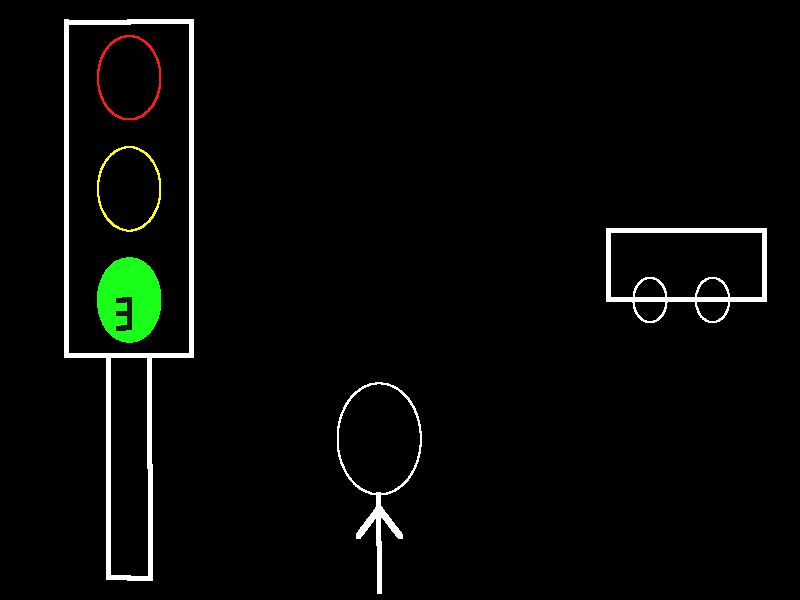

In [ ]:

#gl.glPointSize(1.4)

import random as rand

import time  #animate
from random import random,sample
from math import pi,sin,cos

def randColor(): return sample([0,random(),1],3)

from IPython.display import clear_output #render library
from IPython.display import display #render library
from PIL import Image #render library

def render(): #animate
  img_buf = gl.glReadPixelsub(0, 0, WIDTH, HEIGHT, gl.GL_RGB, gl.GL_UNSIGNED_BYTE)
  img = np.frombuffer(img_buf,np.uint8).reshape(HEIGHT, WIDTH, 3)[::-1]
  display(Image.fromarray(img,'RGB'))


#gl.glClear(gl.GL_COLOR_BUFFER_BIT)


if int(nosh)==3:
    a=300


    t=9


    for i in range(t):
        gl.glClear(gl.GL_COLOR_BUFFER_BIT)

        t=np.array([[1, 0, a],
                     [0, 1, 0],
                     [0, 0, 1]])

        v1 = np.array([[-151],
                        [250],
                        [1]])


        v2 = np.array([[-150],
                        [1],
                        [1]])


        v3 = np.array([[-900],
                        [0],
                        [1]])

        v4 = np.array([[-901],
                        [251],
                        [1]])

        v5 = np.array([[-700],
                        [0],
                        [1]])


        v6 = np.array([[-400],
                        [0],
                        [1]])

        v11 = np.matmul(t,v1)
        v22 = np.matmul(t,v2)
        v33 = np.matmul(t,v3)
        v44 = np.matmul(t,v4)
        v55 = np.matmul(t,v5)
        v66 = np.matmul(t,v6)


        gl.glColor3f(1,1,1)

        run(v11[0][0],v11[1][0], v22[0][0],v22[1][0])
        run(v22[0][0],v22[1][0], v33[0][0],v33[1][0])
        run(v44[0][0],v44[1][0], v11[0][0],v1[1][0])
        run(v44[0][0],v33[1][0], v33[0][0],v44[1][0])
        midpoint_circle(v55[0][0], v55[1][0], 80)
        midpoint_circle(v66[0][0], v66[1][0], 80)






        #blabla
        ##for lightpost
        run(-1400, -1000, -1401, -200)   #left vertical of stand
        run(-1200, -1000, -1201, -200)   #right vertical of stand
        run(-1400, -1000, -1200, -1001)
        run(-1600, -200, -1000, -201)        #nicher horizontal line
        run(-1600, 1000, -1001, 1001)  #uporer horizontal line
        run(-1600, -200, -1601, 1001)
        run(-1000, -201, -1001, 1001)


        X = -1300
        Y = 0
        R = 150
        gl.glColor3f(.1,1,.1) #Green circle
        midpoint_circle(X,Y,R)

        gl.glColor3f(1,1,0.1) #Yellow circle
        midpoint_circle(-1300,400,150)

        gl.glColor3f(1,.1,.1) #Red circle
        midpoint_circle(-1300,800,150)




        #Manus
        gl.glColor3f(1,1,1)
        midpoint_circle(-100,-500,200) #Head
        gl.glColor3f(1,1,1)
        run(-100, -1050, -101, -700) #body
        run(-100,-750, -200,-850) #left hand
        run(-101,-751,0,-850)  #right hand


        for i in range(145,0,-5) :
            gl.glColor3f(.1,1,.1)
            midpoint_circle(-1300,0,i)



        #print 3
        loadDigits(nosh)








        render() #animate
        time.sleep(0.7) #animate
        clear_output(wait=True) #this actually refreshes the window

        #gl.glClear(gl.GL_COLOR_BUFFER_BIT)

        a=a+200



elif (nosh==2 or nosh==1) :
       a=300
       t=9
       for i in range(t):
           t=np.array([[1, 0, 0],
                     [0, 1, a],
                     [0, 0, 1]])




render()

In [ ]:

# #gl.glPointSize(1.4)

# import random as rand

# import time  #animate
# from random import random,sample
# from math import pi,sin,cos

# def randColor(): return sample([0,random(),1],3)

# from IPython.display import clear_output #render library
# from IPython.display import display #render library
# from PIL import Image #render library

# def render(): #animate
#   img_buf = gl.glReadPixelsub(0, 0, WIDTH, HEIGHT, gl.GL_RGB, gl.GL_UNSIGNED_BYTE)
#   img = np.frombuffer(img_buf,np.uint8).reshape(HEIGHT, WIDTH, 3)[::-1]
#   display(Image.fromarray(img,'RGB'))


# #gl.glClear(gl.GL_COLOR_BUFFER_BIT)


# if int(nosh)==3:
#     a=200


#     t=9


#     for i in range(t):
#         gl.glClear(gl.GL_COLOR_BUFFER_BIT)

#         t=np.array([[1, 0, a],
#                      [0, 1, 0],
#                      [0, 0, 1]])

#         v1 = np.array([[-151],
#                         [250],
#                         [1]])


#         v2 = np.array([[-150],
#                         [1],
#                         [1]])


#         v3 = np.array([[-900],
#                         [0],
#                         [1]])

#         v4 = np.array([[-901],
#                         [251],
#                         [1]])

#         v5 = np.array([[-700],
#                         [0],
#                         [1]])


#         v6 = np.array([[-400],
#                         [0],
#                         [1]])

#         v11 = np.matmul(t,v1)
#         v22 = np.matmul(t,v2)
#         v33 = np.matmul(t,v3)
#         v44 = np.matmul(t,v4)
#         v55 = np.matmul(t,v5)
#         v66 = np.matmul(t,v6)


#         gl.glColor3f(1,1,1)

#         run(v11[0][0],v11[1][0], v22[0][0],v22[1][0])
#         run(v22[0][0],v22[1][0], v33[0][0],v33[1][0])
#         run(v44[0][0],v44[1][0], v11[0][0],v1[1][0])
#         run(v44[0][0],v33[1][0], v33[0][0],v44[1][0])
#         midpoint_circle(v55[0][0], v55[1][0], 80)
#         midpoint_circle(v66[0][0], v66[1][0], 80)






#         #blabla
#         ##for lightpost
#         run(-1400, -1000, -1401, -200)   #left vertical of stand
#         run(-1200, -1000, -1201, -200)   #right vertical of stand
#         run(-1400, -1000, -1200, -1001)
#         run(-1600, -200, -1000, -201)        #nicher horizontal line
#         run(-1600, 1000, -1001, 1001)  #uporer horizontal line
#         run(-1600, -200, -1601, 1001)
#         run(-1000, -201, -1001, 1001)


#         X = -1300
#         Y = 0
#         R = 150
#         gl.glColor3f(.1,1,.1) #Green circle
#         midpoint_circle(X,Y,R)

#         gl.glColor3f(1,1,0.1) #Yellow circle
#         midpoint_circle(-1300,400,150)

#         gl.glColor3f(1,.1,.1) #Red circle
#         midpoint_circle(-1300,800,150)




#         #Manus
#         gl.glColor3f(1,1,1)
#         midpoint_circle(-100,-500,200) #Head
#         gl.glColor3f(1,1,1)
#         run(-100, -1050, -101, -700) #body
#         run(-100,-750, -200,-850) #left hand
#         run(-101,-751,0,-850)  #right hand


#         for i in range(145,0,-5) :
#             gl.glColor3f(.1,1,.1)
#             midpoint_circle(-1300,0,i)



#         #print 3
#         loadDigits(nosh)








#         render() #animate
#         time.sleep(0.7) #animate
#         clear_output(wait=True) #this actually refreshes the window

#         #gl.glClear(gl.GL_COLOR_BUFFER_BIT)

#         a=a+200
# #render()


# elif int(nosh)==2 or int(nosh)==1:
#     b=200
#     t=10

#     no=1
#     po=1

#     for i in range(t):
#         gl.glClear(gl.GL_COLOR_BUFFER_BIT)

#         t=np.array([[1, 0, 0],
#                      [0, 1, b],
#                      [0, 0, 1]])




#         s=np.array([[no, 0, 0],
#                      [0, po, 0],
#                      [0, 0, 1]])


#         result=np.array([[no*1, 0, 0],
#                      [0, po*1, b*1],
#                      [0, 0, 1]])




#         v1 = np.array([[-100],
#                         [-1050],
#                         [1]])


#         v2 = np.array([[-101],
#                         [-700],
#                         [1]])


#         v3 = np.array([[-100],
#                         [-750],
#                         [1]])

#         v4 = np.array([[-200],
#                         [-850],
#                         [1]])


#         v5 = np.array([[-101],
#                         [-751],
#                         [1]])

#         v6 = np.array([[0],
#                         [-850],
#                         [1]])


#         v7 = np.array([[-100],
#                         [-500],
#                         [1]])


#         v11 = np.matmul(s,v1)
#         v22 = np.matmul(t,v2)
#         v33 = np.matmul(t,v3)
#         v44 = np.matmul(s,v4)
#         v55 = np.matmul(t,v5)
#         v66 = np.matmul(s,v6)
#         v77 = np.matmul(s,v7)

#         gl.glColor3f(1,1,1)

#         #Manus moving
#         gl.glColor3f(1,1,1)
#         midpoint_circle(v77[0][0], v77[1][0], 200) #Head
#         gl.glColor3f(1,1,1)
#         run(v11[0][0],v11[1][0], v22[0][0],v22[1][0]) #body
#         run(v33[0][0],v33[1][0], v44[0][0],v44[1][0])#left hand
#         run(v55[0][0],v55[1][0], v66[0][0],v66[1][0]) #right hand

#         b=b+200



#         render() #animate
#         time.sleep(0.7) #animate
#         clear_output(wait=True) #this actually refreshes the window

#         #gl.glClear(gl.GL_COLOR_BUFFER_BIT)

#         b=b+300
#         no=no-0.25
#         po=po-0.25




# render()

In [ ]:
# def findZone(dx,dy):
#     if abs(dx)>abs(dy):
#         if dx>0 and dy>0:
#             return 0
#         elif dx<0 and dy>0:
#             return 3
#         elif dx<0  and dy<0:
#             return 4
#         elif dx>0 and dy<0:
#             return 7
#     else:
#         if dx > 0 and dy > 0:
#             return 1
#         elif dx < 0 and dy > 0:
#             return 2
#         elif dx < 0 and dy < 0:
#             return 5
#         elif dx > 0 and dy < 0:
#             return 6

# def convertZone_0_to_n(zone,x1,y1):
#     if zone == 0:
#         return x1,y1
#     elif zone == 1:
#         return y1,x1
#     elif zone == 2:
#         return -y1,x1
#     elif zone == 3:
#         return -x1,y1
#     elif zone == 4:
#         return -x1,-y1
#     elif zone == 5:
#         return -y1,-x1
#     elif zone == 6:
#         return y1,-x1
#     elif zone == 7:
#         return x1,-y1
# def convertZone_n_to_0(zone,x1,y1,x2,y2):
#     if zone == 0:
#         return x1,y1,x2,y2
#     elif zone == 1:
#         return y1,x1,y2,x2
#     elif zone == 2:
#         return y1,-x1,y2,-x2
#     elif zone == 3:
#         return -x1,y1,-x2,y2
#     elif zone == 4:
#         return -x1,-y1,-x2,-y2
#     elif zone == 5:
#         return -y1,-x1,-y2,-x2
#     elif zone == 6:
#         return -y1,x1,-y2,x2
#     elif zone == 7:
#         return x1,-y1,x2,-y2



# def midPointAlgorithm(zone,x1,y1,x2,y2):
#     dx = x2 - x1
#     dy = y2 - y1

#     D = 2*dy - dx
#     D_NE = 2*(dy-dx)
#     DE = 2*dy
#     x = x1
#     y = y1


#     # iterate through value of X
#     while (x < x2):
#         x = x + 1
#         if (D < 0):
#             D+=DE
#         else:
#             D+=D_NE
#             y = y + 1
#         a,b = convertZone_0_to_n(zone,x,y)
#         gl.glPointSize(5)
#         gl.glBegin(gl.GL_POINTS)
#         gl.glVertex2f(a/1920,b/1080)
#         gl.glEnd()




# def run(x1,y1,x2,y2):
#     dx = x2-x1
#     dy = y2-y1
#     zone = findZone(dx,dy)
#     x1,y1,x2,y2 = convertZone_n_to_0(zone,x1,y1,x2,y2)
#     midPointAlgorithm(zone,x1,y1,x2,y2)



# run(-1400, -1000, -1401, -200)   #left vertical of stand
# run(-1200, -1000, -1201, -200)   #right vertical of stand
# run(-1400, -1000, -1200, -1001)
# run(-1600, -200, -1000, -201)        #nicher horizontal line
# run(-1600, 1000, -1001, 1001)  #uporer horizontal line
# run(-1600, -200, -1601, 1001)
# run(-1000, -201, -1001, 1001)


In [ ]:

# def drawPoints(x,y):
#     gl.glPointSize(2)
#     #gl.glColor3f(1,.1,.1)
#     gl.glBegin(gl.GL_POINTS)
#     gl.glVertex2f(x/1920,y/1080)
#     gl.glEnd()



# def midpoint_circle(X,Y,R):
#     D = 1 - R
#     x = 0
#     y = R

#     while x < y:
#         if D < 0:
#             D = D + 2*x + 3
#             x+=1
#         else:
#             D = D + 2*x -2*y +5
#             x+=1
#             y-=1

#         drawPoints(X+y,Y+x) #Zone 0
#         drawPoints(X+x,Y+y) #Zone 1
#         drawPoints(X-x,Y+y) #Zone 2
#         drawPoints(X-y, Y+x) #Zone 3
#         drawPoints(X-y,Y-x) #Zone 4
#         drawPoints(X-x,Y-y) #Zone 5
#         drawPoints(X+x,Y-y) #Zone 6
#         drawPoints(X+y,Y-x) #Zone 7


# X = -1300
# Y = 0
# R = 150
# gl.glColor3f(.1,1,.1) #Green circle
# midpoint_circle(X,Y,R)

# gl.glColor3f(1,1,0.1) #Yellow circle
# midpoint_circle(-1300,400,150)

# gl.glColor3f(1,.1,.1) #Red circle
# midpoint_circle(-1300,800,150)




# #Manus
# gl.glColor3f(1,1,1)
# midpoint_circle(-100,-500,200) #Head
# gl.glColor3f(1,1,1)
# run(-100, -1050, -101, -700) #body


# if int(nosh)==3:
#   for i in range(145,0,-5) :
#       gl.glColor3f(.1,1,.1)
#       midpoint_circle(-1300,0,i)


In [ ]:
# from IPython.display import display
# from PIL import Image

# img_buf = gl.glReadPixelsub(0, 0, WIDTH, HEIGHT, gl.GL_RGB, gl.GL_UNSIGNED_BYTE)
# img = np.frombuffer(img_buf,np.uint8).reshape(HEIGHT, WIDTH, 3)[::-1]
# display(Image.fromarray(img,'RGB'))